## ResFPN Classifier Tutorial

In [1]:
import tensorflow as tf
print('TF Version:', tf.__version__)
#print('GPUs:', len(tf.config.list_physical_devices('GPU')))

import numpy as np
import matplotlib.pyplot as plt
import os, sys

TF Version: 2.3.1


In [2]:
# Get current working directory
ROOT_DIR = os.getcwd()

# python files directory
PY_DIR = 'directory/to/python/files'
sys.path.append(PY_DIR)

# dataset directory
DATASET_DIR = 'directory/to/flower_photos'
sys.path.append(DATASET_DIR)

### TF Dataset

In [3]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATASET_DIR, 
    labels='inferred', 
    label_mode='int',
    class_names=None, 
    color_mode='rgb', 
    batch_size=BATCH_SIZE, 
    image_size=IMAGE_SIZE, 
    shuffle=True, 
    seed=123, 
    validation_split=0.1, 
    subset='training',
    interpolation='bilinear', 
    follow_links=False
)

for x_train_batch, y_train_batch in train_ds.take(1):
    print(x_train_batch.shape, y_train_batch.shape)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
(32, 256, 256, 3) (32,)


In [5]:
class_names = train_ds.class_names
print('classes:', class_names)
NUM_CLASSES = len(class_names)

classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATASET_DIR, 
    labels='inferred', 
    label_mode='int',
    class_names=None, 
    color_mode='rgb', 
    batch_size=BATCH_SIZE, 
    image_size=IMAGE_SIZE, 
    shuffle=True, 
    seed=123, 
    validation_split=0.1, 
    subset='validation',
    interpolation='bilinear', 
    follow_links=False
)

for x_val_batch, y_val_batch in val_ds.take(1):
    print(x_val_batch.shape, y_val_batch.shape)

Found 3670 files belonging to 5 classes.
Using 367 files for validation.
(32, 256, 256, 3) (32,)


#### Visualization

In [7]:
num_batches = train_ds.cardinality().numpy()
n = np.random.choice(np.arange(1,num_batches+1))
print(n)

48


C:\Users\mingm\miniconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


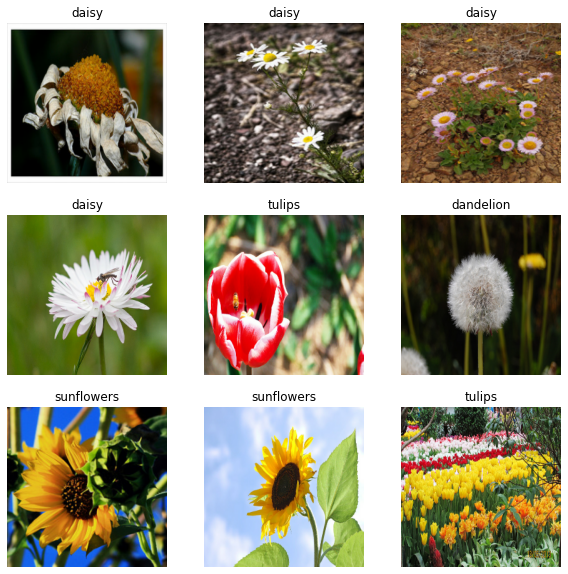

In [8]:
plt.figure(figsize=(10, 10))
for x_train_batch, y_train_batch in train_ds.take(n):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(tf.cast(x_train_batch[i], tf.int32))
        plt.title(class_names[y_train_batch[i]])
        plt.axis('off')

### ResFPN Classifier

In [9]:
import resnet, fpn, resnet_fpn

In [10]:
ResFPN = resnet_fpn.ResFPN_Classifier(
    image_shape=IMAGE_SIZE + (3,), 
    num_classes=NUM_CLASSES, 
    num_filters=256, 
    architecture='resnet50', 
    augmentation=True)

In [11]:
ResFPN.model.summary()

Model: "resnet50_fpn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_images (InputLayer)       [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
random_flip (RandomFlip)        (None, 256, 256, 3)  0           input_images[0][0]               
__________________________________________________________________________________________________
random_rotation (RandomRotation (None, 256, 256, 3)  0           random_flip[0][0]                
__________________________________________________________________________________________________
random_zoom (RandomZoom)        (None, 256, 256, 3)  0           random_rotation[0][0]            
_______________________________________________________________________________________

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(1)
val_ds = val_ds.cache().prefetch(1)

In [13]:
ResFPN.train(
    train_dataset=train_ds, 
    val_dataset=val_ds, 
    epochs=15, 
    lr=0.001, 
    momentum=0.9, 
    l2=0.3, 
    save_weights=False)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
104/104 [==============================] - ETA: 0s - loss: 24.1400 - dense_resnet_loss: 1.4623 - dense_fpn_2_loss: 1.7971 - dense_fpn_3_loss: 1.7629 - dense_fpn_4_loss: 1.6307 - dense_fpn_5_loss: 1.5377 - dense_resnet_accuracy: 0.3984 - dense_fpn_2_accuracy: 0.4008 - dense_fpn_3_accuracy: 0.3933 - dense_fpn_4_accuracy: 0.3860 - dense_fpn_5_accuracy: 0.3884WARNING:t

104/104 [==============================] - 34s 330ms/step - loss: 20.2382 - dense_resnet_loss: 0.8508 - dense_fpn_2_loss: 0.8963 - dense_fpn_3_loss: 0.8808 - dense_fpn_4_loss: 0.8530 - dense_fpn_5_loss: 0.8082 - dense_resnet_accuracy: 0.6824 - dense_fpn_2_accuracy: 0.6618 - dense_fpn_3_accuracy: 0.6739 - dense_fpn_4_accuracy: 0.6800 - dense_fpn_5_accuracy: 0.6975 - val_loss: 19.8650 - val_dense_resnet_loss: 0.7768 - val_dense_fpn_2_loss: 0.7866 - val_dense_fpn_3_loss: 0.8104 - val_dense_fpn_4_loss: 0.7850 - val_dense_fpn_5_loss: 0.7571 - val_dense_resnet_accuracy: 0.7330 - val_dense_fpn_2_accuracy: 0.7221 - val_dense_fpn_3_accuracy: 0.7112 - val_dense_fpn_4_accuracy: 0.7166 - val_dense_fpn_5_accuracy: 0.7166
Epoch 9/15
104/104 [==============================] - 34s 328ms/step - loss: 19.9499 - dense_resnet_loss: 0.7857 - dense_fpn_2_loss: 0.8320 - dense_fpn_3_loss: 0.8229 - dense_fpn_4_loss: 0.7962 - dense_fpn_5_loss: 0.7638 - dense_resnet_accuracy: 0.7142 - dense_fpn_2_accuracy: 0.690

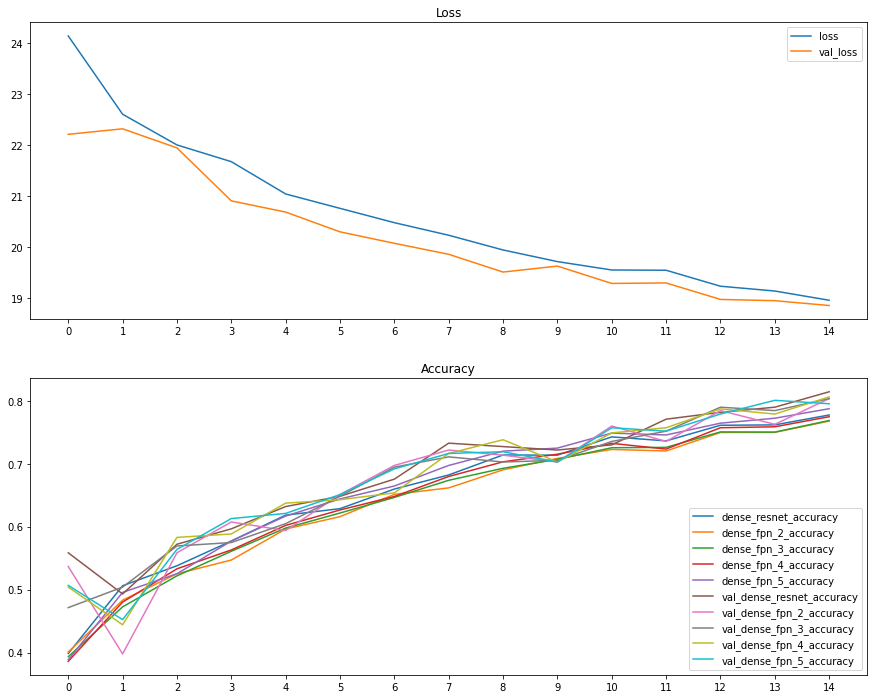

In [14]:
ResFPN.plot()

In [15]:
top_idxes, ensemble_acc = ResFPN.select_top(val_ds, top=3)

12/12 [==============================] - 1s 93ms/step - loss: 18.8623 - dense_resnet_loss: 0.5781 - dense_fpn_2_loss: 0.5726 - dense_fpn_3_loss: 0.5763 - dense_fpn_4_loss: 0.5940 - dense_fpn_5_loss: 0.5922 - dense_resnet_accuracy: 0.8147 - dense_fpn_2_accuracy: 0.8038 - dense_fpn_3_accuracy: 0.8038 - dense_fpn_4_accuracy: 0.8065 - dense_fpn_5_accuracy: 0.7956
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [16]:
classifier_names = ['resnet']
for i in np.arange(5):
    classifier_names += ['res_fpn_%d' % (i+2)]
print('Top classifiers:', [classifier_names[i] for i in top_idxes])
print('Ensembled classifier accuracy:', ensemble_acc)

Top classifiers: ['res_fpn_3', 'res_fpn_2', 'resnet']
Ensembled classifier accuracy: 0.8088541666666668
